In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../Raws/Video_Games_Sales_as_at_22_Dec_2016.csv",header=0, encoding='unicode_escape')

In [3]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df[df['Name'].notna()]

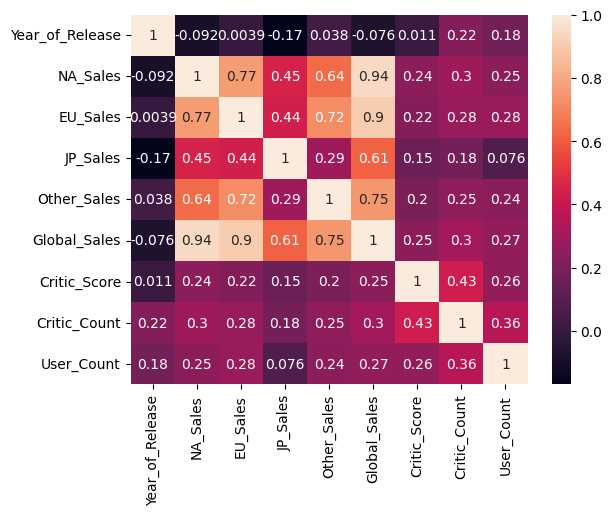

In [27]:
#antes de ponernos con Monster Hunter, vamos a ver un Heatmap de la df en su totalidad.

df = df.select_dtypes(include=['int', 'float'])
sns.heatmap(df.corr(), annot=True);

In [ ]:
#A primera vista, podemos ver, que las principales ventas son en EU y NA, JP no se queda atras, pero imposible que sola pueda igualarlos.

In [ ]:
#Vamos a verlo de otra forma mas numerica.

In [33]:
df_ventas = df[["NA_Sales","EU_Sales","JP_Sales", "Other_Sales"]]

In [36]:
df_ventas.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16717.000000,16717.000000,16717.000000,16717.000000
mean,0.263255,0.145010,0.077610,0.047333
std,0.813475,0.503303,0.308836,0.186721
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


In [37]:
#Segun el describe, las medias de ventas de EU y NA son mucho mayores que las de JP.
#Al igual que el resto de valores.

In [5]:
MH_df = df[df["Name"].str.contains("Monster Hunter")]
MH_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
163,Monster Hunter Freedom Unite,PSP,2008.0,Role-Playing,Capcom,0.47,0.55,4.13,0.34,5.48,81.0,48.0,8.7,124.0,Capcom,T
215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87,NaN,NaN,NaN,NaN,NaN,NaN
312,Monster Hunter 4 Ultimate,3DS,2014.0,Role-Playing,Nintendo,0.68,0.48,2.62,0.11,3.89,86.0,80.0,8.7,348.0,Capcom,T
385,Monster Hunter 4,3DS,2013.0,Role-Playing,Capcom,0.00,0.00,3.44,0.00,3.44,NaN,NaN,NaN,NaN,NaN,NaN
406,Monster Hunter X,3DS,2015.0,Action,Capcom,0.27,0.21,2.79,0.05,3.32,NaN,NaN,NaN,NaN,NaN,NaN
532,Monster Hunter Tri,3DS,2011.0,Role-Playing,Nintendo,0.46,0.29,1.96,0.07,2.79,NaN,NaN,NaN,NaN,NaN,NaN
598,Monster Hunter Freedom 2,PSP,2007.0,Role-Playing,Capcom,0.37,0.27,1.75,0.18,2.57,72.0,38.0,8.7,83.0,Capcom,T
729,Monster Hunter Tri,Wii,2009.0,Role-Playing,Nintendo,0.65,0.40,1.05,0.11,2.22,84.0,70.0,8.6,219.0,Capcom,T
1457,Monster Hunter Freedom,PSP,2005.0,Role-Playing,Capcom,0.24,0.03,1.03,0.04,1.34,71.0,34.0,8.6,78.0,Capcom,T
2940,Monster Hunter Tri,WiiU,2012.0,Role-Playing,Nintendo,0.24,0.19,0.22,0.04,0.69,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
MH_df["Platform"].value_counts()

Platform
3DS     6
X360    5
PSP     4
PS2     3
Wii     2
PS3     2
WiiU    1
Name: count, dtype: int64

In [12]:
numerico = MH_df.select_dtypes(include=['int', 'float'])
numerico

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
163,2008.0,0.47,0.55,4.13,0.34,5.48,81.0,48.0,124.0
215,2010.0,0.00,0.00,4.87,0.00,4.87,NaN,NaN,NaN
312,2014.0,0.68,0.48,2.62,0.11,3.89,86.0,80.0,348.0
385,2013.0,0.00,0.00,3.44,0.00,3.44,NaN,NaN,NaN
406,2015.0,0.27,0.21,2.79,0.05,3.32,NaN,NaN,NaN
532,2011.0,0.46,0.29,1.96,0.07,2.79,NaN,NaN,NaN
598,2007.0,0.37,0.27,1.75,0.18,2.57,72.0,38.0,83.0
729,2009.0,0.65,0.40,1.05,0.11,2.22,84.0,70.0,219.0
1457,2005.0,0.24,0.03,1.03,0.04,1.34,71.0,34.0,78.0
2940,2012.0,0.24,0.19,0.22,0.04,0.69,NaN,NaN,NaN


<Axes: >

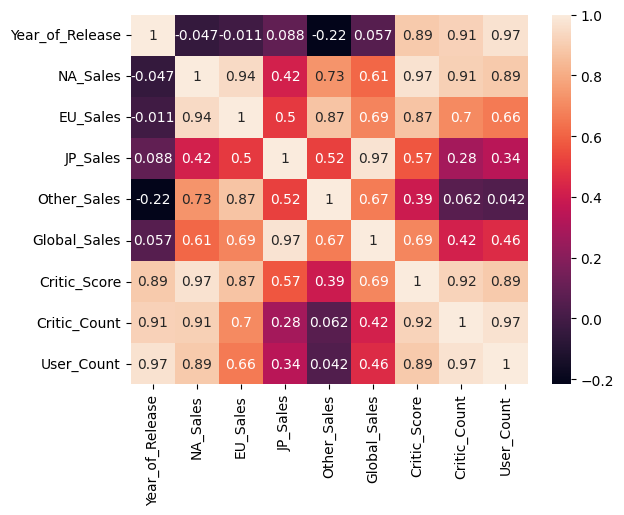

In [13]:
sns.heatmap(numerico.corr(), annot= True);

In [ ]:
#Segun el heatmap, las ventas de JP tienen la mayor correlación con las ventas globales, frente a EU y NA.

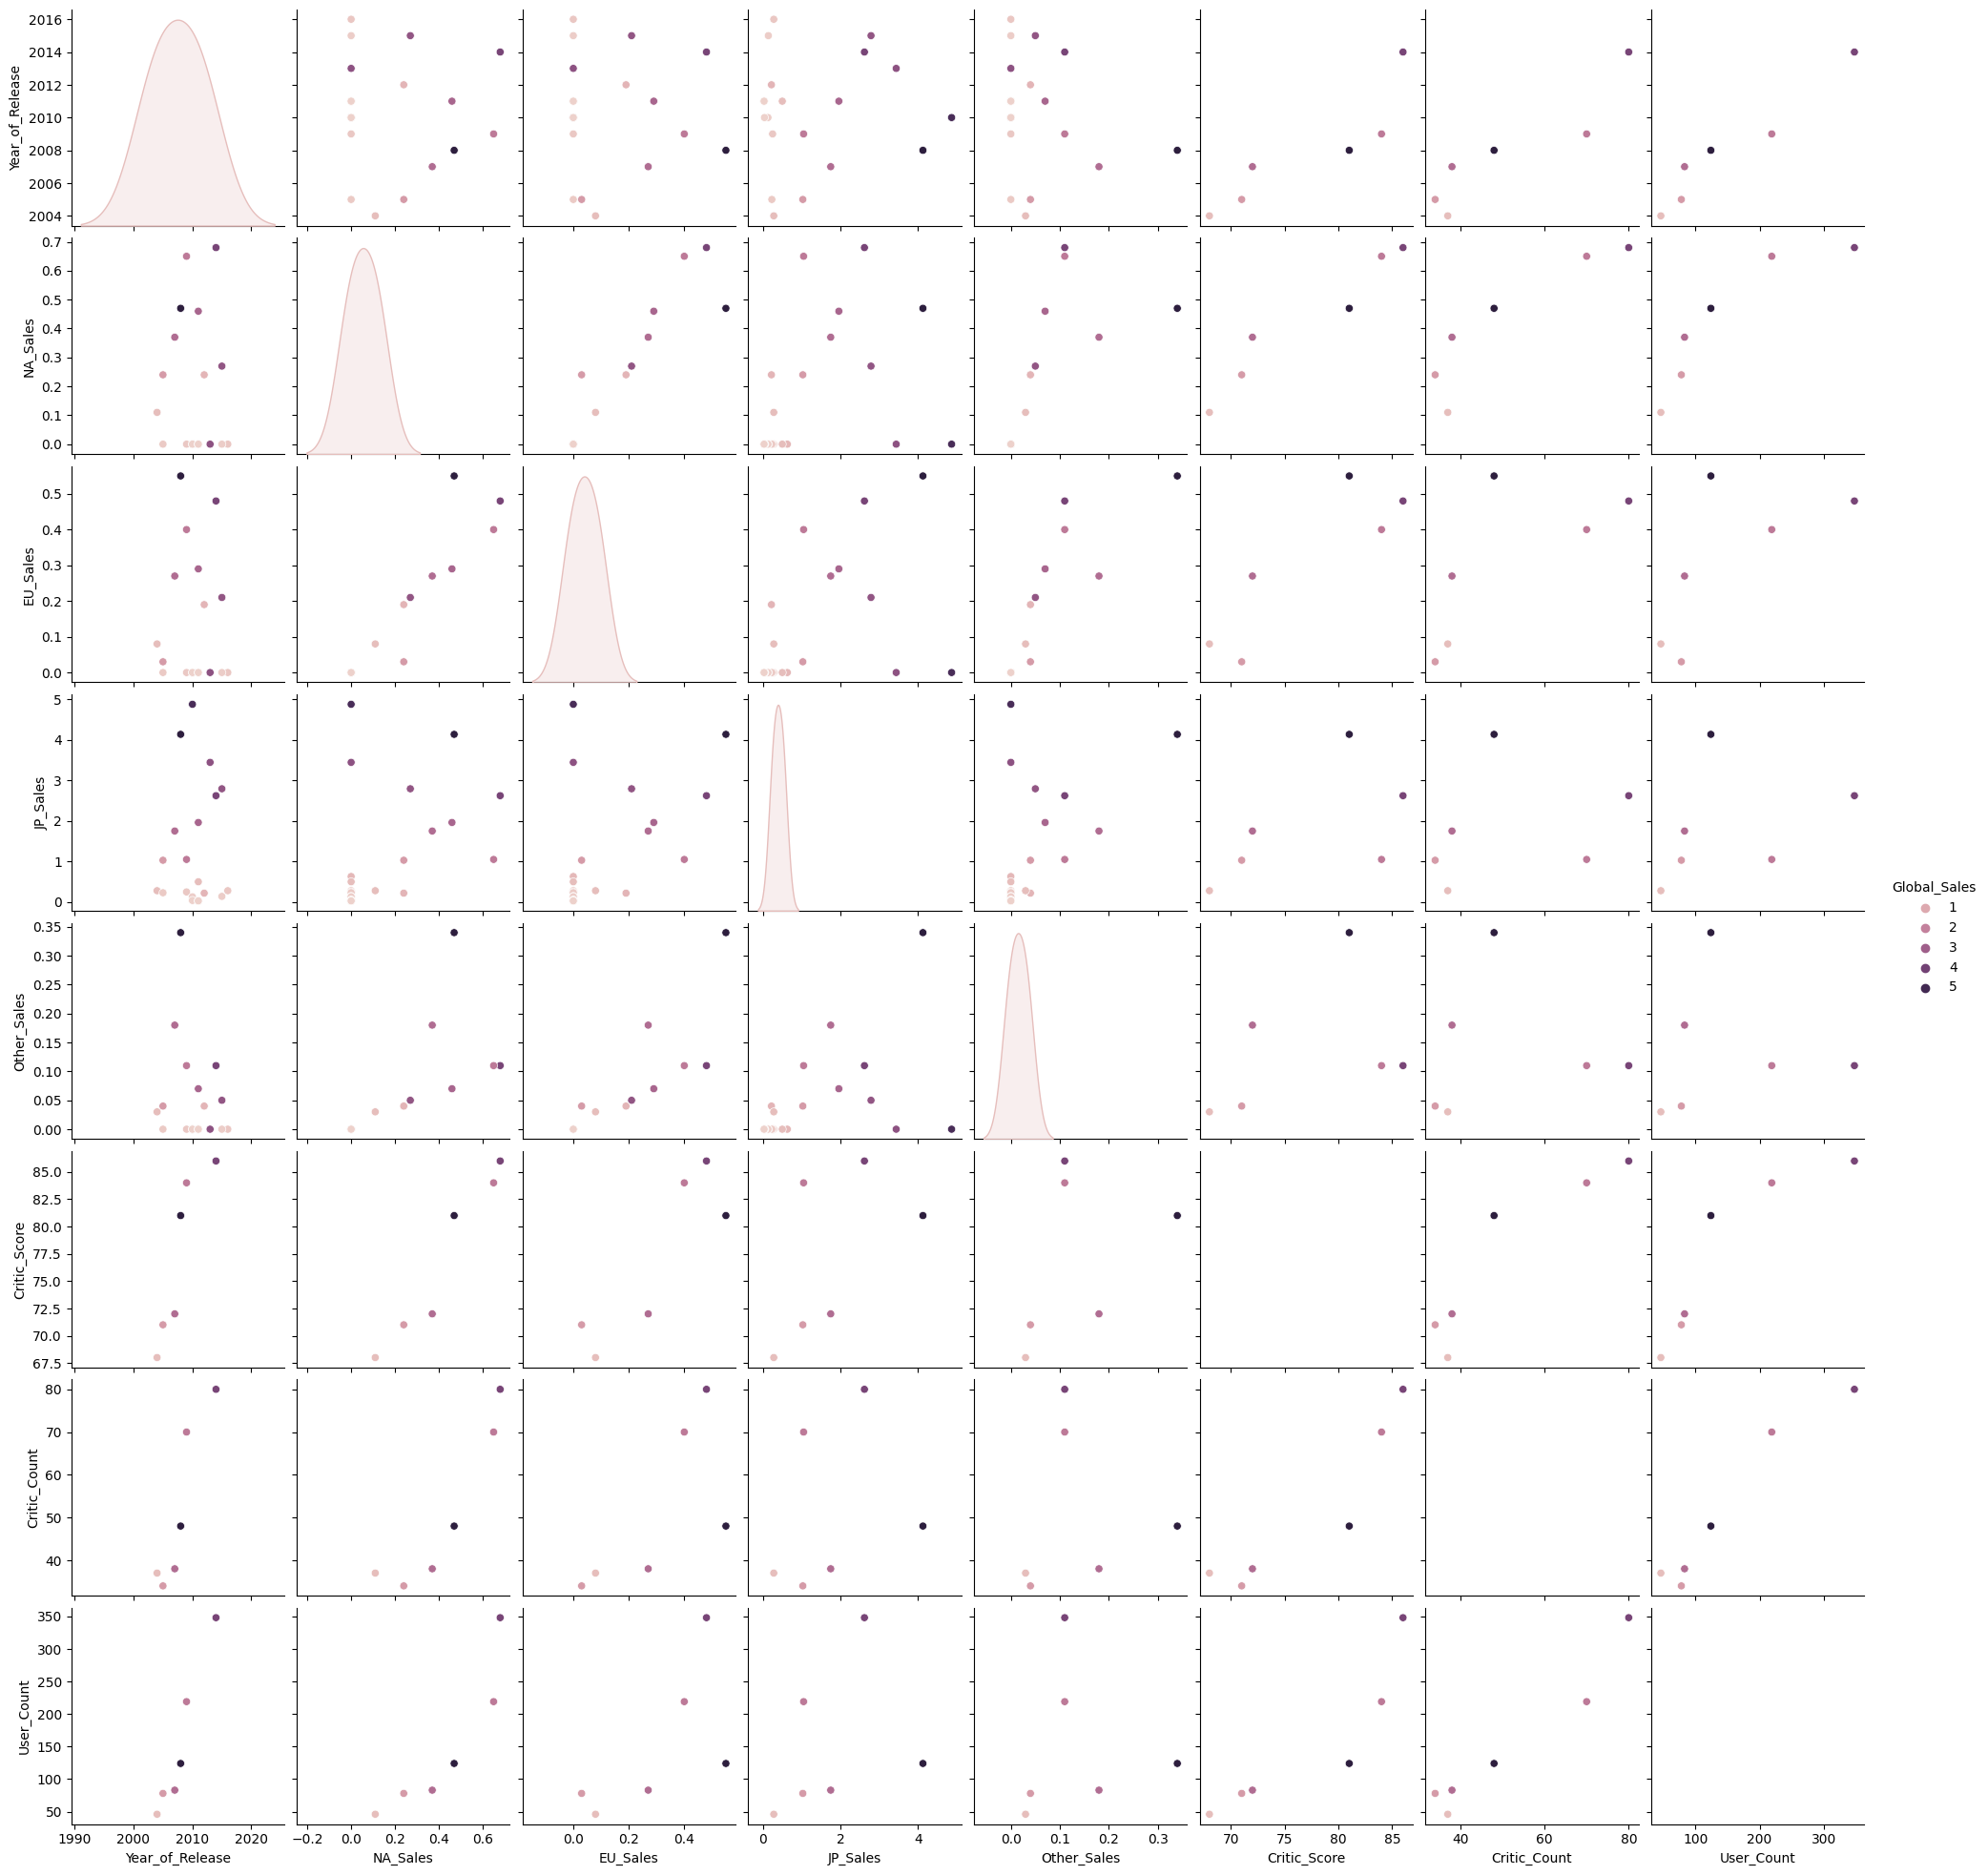

In [14]:
sns.pairplot(MH_df, hue= "Global_Sales");

In [17]:
MH3DS_df = MH_df[MH_df["Platform"]=="3DS"]
#3DS tiene un spin off que no nos interesa, lo quito en la linea de abajo
MH3DS_df.drop(MH3DS_df.tail(1).index,inplace=True)
MHX360_df = MH_df[MH_df["Platform"]=="X360"]
MHPSP_df = MH_df[MH_df["Platform"]=="PSP"]
MHPS2_df = MH_df[MH_df["Platform"]=="PS2"]
MHWii_df = MH_df[MH_df["Platform"]=="Wii"]
MHPS3_df = MH_df[MH_df["Platform"]=="PS3"]
MHWiiU_df = MH_df[MH_df["Platform"]=="WiiU"]


C:\Users\Usuario\AppData\Local\Temp\ipykernel_14208\1460054554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MH3DS_df.drop(MH3DS_df.tail(1).index,inplace=True)


In [22]:
display(MH3DS_df)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
312,Monster Hunter 4 Ultimate,3DS,2014.0,Role-Playing,Nintendo,0.68,0.48,2.62,0.11,3.89,86.0,80.0,8.7,348.0,Capcom,T
385,Monster Hunter 4,3DS,2013.0,Role-Playing,Capcom,0.00,0.00,3.44,0.00,3.44,NaN,NaN,NaN,NaN,NaN,NaN
406,Monster Hunter X,3DS,2015.0,Action,Capcom,0.27,0.21,2.79,0.05,3.32,NaN,NaN,NaN,NaN,NaN,NaN
532,Monster Hunter Tri,3DS,2011.0,Role-Playing,Nintendo,0.46,0.29,1.96,0.07,2.79,NaN,NaN,NaN,NaN,NaN,NaN
6163,Monster Hunter Stories,3DS,2016.0,Action,Capcom,0.00,0.00,0.28,0.00,0.28,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#Segun podemos ver en la dataframe, los juegos que tambien han salido en occidente, tienen un mayor numero de ventas globales, pese a que han tenido menos en Japón

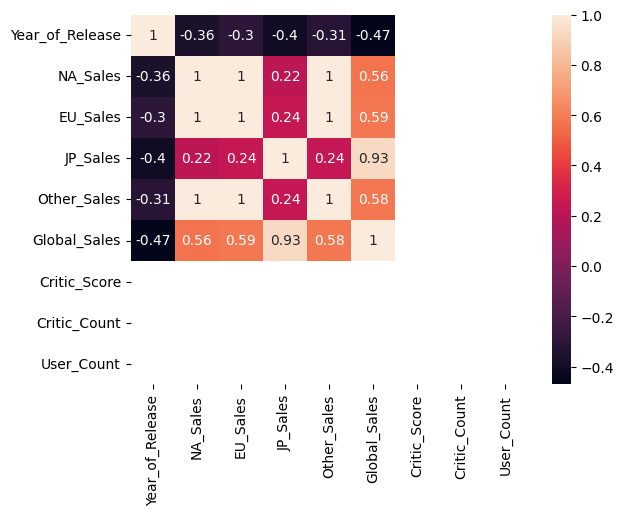

In [24]:
#3DS es la que mas nos interesa, vamos a analizarla.
numerico3DS = MH3DS_df.select_dtypes(include=['int', 'float'])
sns.heatmap(numerico3DS.corr(), annot=True);
#parece que los NaN hace que salga un poco vacia, pero tiene los datos que nos interesan, que son las ventas.

In [ ]:
#El propio heatmap nos lo muestra, en la 3DS, que es una plataforma mas casual para los jugadores, las ventas se acercan a las de JP.

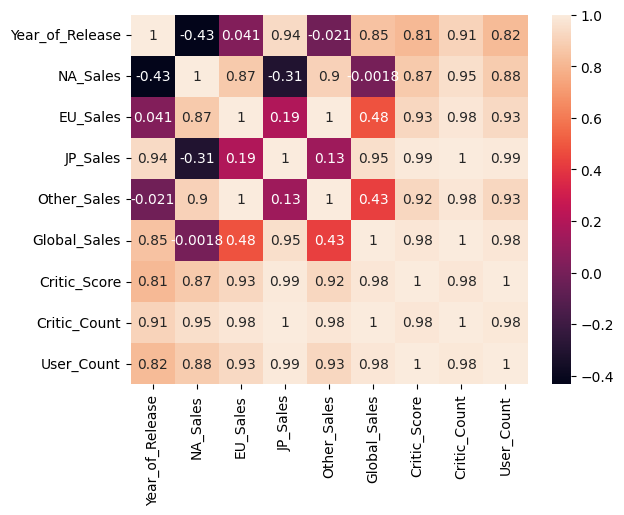

In [25]:
numericoPSP = MHPSP_df.select_dtypes(include=['int', 'float'])
sns.heatmap(numericoPSP.corr(), annot=True);

In [26]:
#En el caso de PSP, solo en NA

In [23]:
#ya las tenemos separadas, vamos a analizar primero las ventas totales en cada plataforma.
lista_ventas = {}
lista_ventas["3DS"] = MH3DS_df["Global_Sales"].sum()
lista_ventas["X360"] = MHX360_df["Global_Sales"].sum()
lista_ventas["PSP"] = round(MHPSP_df["Global_Sales"].sum(),2)
lista_ventas["PS2"] = round(MHPS2_df["Global_Sales"].sum(),2)
lista_ventas["Wii"] = MHWii_df["Global_Sales"].sum()
lista_ventas["PS3"] = MHPS3_df["Global_Sales"].sum()
lista_ventas["WiiU"] = MHWiiU_df["Global_Sales"].sum()
lista_ventas

ventas_globales = pd.DataFrame(lista_ventas.items(),columns=["Plataforma","Ventas_Globales"])
ventas_globales

,Plataforma,Ventas_Globales
0,3DS,13.72
1,X360,0.26
2,PSP,14.26
3,PS2,1.36
4,Wii,2.47
5,PS3,0.55
6,WiiU,0.69


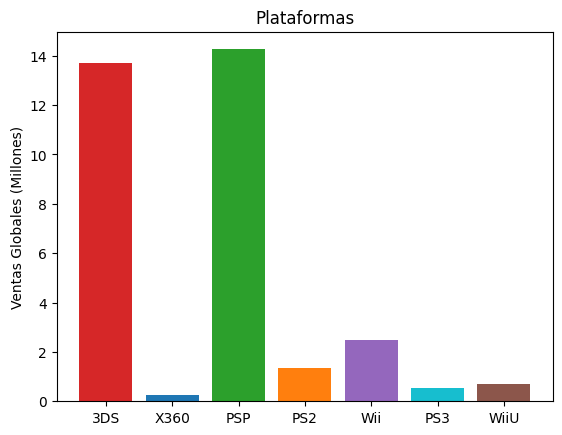

In [24]:
fig, ax = plt.subplots()

ventas = lista_ventas.values()
plataformas = lista_ventas.keys()
bar_labels = ['3DS', 'X360', 'PSP', 'PS2', "Wii","PS3","WiiU"]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange','tab:purple','tab:cyan','tab:brown']

ax.bar(plataformas, ventas, label=bar_labels, color=bar_colors)

ax.set_ylabel('Ventas Globales (Millones)')
ax.set_title('Plataformas')


plt.show()

In [25]:
#nos centramos en las mas exitosas, que son 3DS y PSP
display("DATOS DE 3DS")
display(MH3DS_df)
display("DATOS DE PSP")
display(MHPSP_df)

'DATOS DE 3DS'

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
312,Monster Hunter 4 Ultimate,3DS,2014.0,Role-Playing,Nintendo,0.68,0.48,2.62,0.11,3.89,86.0,80.0,8.7,348.0,Capcom,T
385,Monster Hunter 4,3DS,2013.0,Role-Playing,Capcom,0.00,0.00,3.44,0.00,3.44,NaN,NaN,NaN,NaN,NaN,NaN
406,Monster Hunter X,3DS,2015.0,Action,Capcom,0.27,0.21,2.79,0.05,3.32,NaN,NaN,NaN,NaN,NaN,NaN
532,Monster Hunter Tri,3DS,2011.0,Role-Playing,Nintendo,0.46,0.29,1.96,0.07,2.79,NaN,NaN,NaN,NaN,NaN,NaN
6163,Monster Hunter Stories,3DS,2016.0,Action,Capcom,0.00,0.00,0.28,0.00,0.28,NaN,NaN,NaN,NaN,NaN,NaN


'DATOS DE PSP'

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
163,Monster Hunter Freedom Unite,PSP,2008.0,Role-Playing,Capcom,0.47,0.55,4.13,0.34,5.48,81.0,48.0,8.7,124.0,Capcom,T
215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87,NaN,NaN,NaN,NaN,NaN,NaN
598,Monster Hunter Freedom 2,PSP,2007.0,Role-Playing,Capcom,0.37,0.27,1.75,0.18,2.57,72.0,38.0,8.7,83.0,Capcom,T
1457,Monster Hunter Freedom,PSP,2005.0,Role-Playing,Capcom,0.24,0.03,1.03,0.04,1.34,71.0,34.0,8.6,78.0,Capcom,T


In [26]:
#Podemos ver, que los juegos mas vendidos:
display(MH3DS_df.head(1))
display(MHPSP_df.head(1))

"""
A: ambos tambien salieron en occidente, ya que tenemos ventas en EU y NA
B: Ambos coinciden con una plataforma portatil (explicado en presentacion, pero el juego puede ser mucho mejor graficamente.)
C: Ambas son versiones con mas contenido que el juego base, EJ: Monster Hunter 4 ultimate tiene mas contenido que Monster Hunter 4
""";

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
312,Monster Hunter 4 Ultimate,3DS,2014.0,Role-Playing,Nintendo,0.68,0.48,2.62,0.11,3.89,86.0,80.0,8.7,348.0,Capcom,T


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
163,Monster Hunter Freedom Unite,PSP,2008.0,Role-Playing,Capcom,0.47,0.55,4.13,0.34,5.48,81.0,48.0,8.7,124.0,Capcom,T


In [27]:
#Aqui exporto todo lo procesado.

In [28]:
MH_df.to_csv("../../Datos procesados/Ventas Monster Hunter todas plataformas.csv")
MH3DS_df.to_csv("../../Datos procesados/Ventas Monster 3DS.csv")
MHX360_df.to_csv("../../Datos procesados/Ventas Monster X360.csv")
MHPSP_df.to_csv("../../Datos procesados/Ventas Monster PSP.csv")
MHPS2_df.to_csv("../../Datos procesados/Ventas Monster PS2.csv")
MHWii_df.to_csv("../../Datos procesados/Ventas Monster Wii.csv")
MHPS3_df.to_csv("../../Datos procesados/Ventas Monster PS3.csv")
MHWiiU_df.to_csv("../../Datos procesados/Ventas Monster WiiU.csv")
ventas_globales.to_csv("../../Datos procesados/Ventas globales por plataforma Monster Hunter.csv")